# Import Library

In [1]:
import pandas as pd
import numpy as np
import itertools

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import shap

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

# Define Function

In [2]:
# Handcrafted function definition
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def confusionMatrix(modelInput, feature, label, classInfo=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]):
    pred = modelInput.predict(feature) # 코드 추가
    label, pred = to_categorical(label), to_categorical(pred)

    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classInfo, normalize=False, title='')
    plt.show()

# Load Dataset

In [4]:
# CSV 파일 경로
file_path = './dbids_train_labeled.csv'

# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv(file_path)

In [5]:
# DataFrame 출력
df

,class,queryMode,queryLength,fieldNum,tableNum,tableId,projectionNum.account_permission,projectionId.account_permission,projectionNum.address,projectionId.address,...,groupById.watch_item,groupByNum.watch_list,groupById.watch_list,groupByNum.zip_code,groupById.zip_code,joinNum,andOrNum,stringValuesLength,stringValueNum,numericValueNum
0,1,1,424,4,4,1140883472,0,0,0,0,...,0,0,0,0,0,0,5,19,1,5
1,1,1,284,5,1,67108864,0,0,0,0,...,0,0,0,0,0,0,3,19,1,3
2,1,1,395,6,4,1073777664,0,0,0,0,...,0,0,0,0,0,0,5,0,0,6
3,1,1,316,4,2,2064,0,0,0,0,...,0,0,0,0,0,0,3,0,0,4
4,1,1,423,4,3,1073743888,0,0,0,0,...,0,0,0,0,0,0,5,57,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11,2,105,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38,2,0
10996,11,3,110,2,1,512,0,0,0,0,...,0,0,0,0,0,0,0,19,1,2
10997,11,3,88,2,1,8,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
10998,11,4,80,0,1,1024,0,0,0,0,...,0,0,0,0,0,0,1,19,1,1


# Split Train & Test Set

In [6]:
# 특성과 레이블 분리
X = df.drop('class', axis=1)  # 'label' 열 제거하여 특성 추출
y = df['class'] - 1  # 레이블을 0부터 시작하도록 조정

In [7]:
# 데이터를 8:2 비율로 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Train XGBoost

In [8]:
# XGBoost 모델 생성
model = XGBClassifier()

# 모델 학습 (훈련 데이터 사용)
model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.945


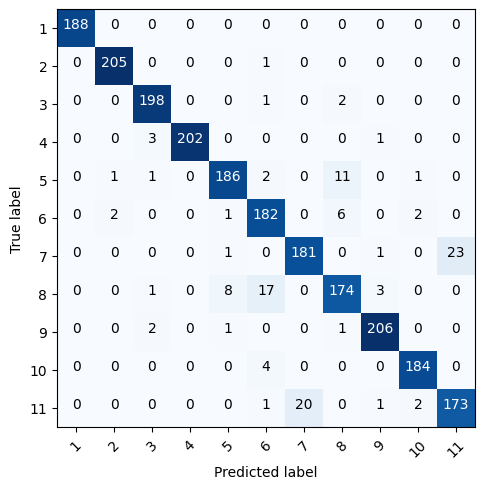

In [9]:
# Confusion matrix
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
confusionMatrix(model, X_test, Y_test, classInfo=label)

# Train Random Forest

In [10]:
# Random Forest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=10)

# 모델 학습 (훈련 데이터 사용)
rf_model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred_rf = rf_model.predict(X_test)

# 정확도 평가
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9095454545454545


# Train Decision Tree

In [11]:
# Decision Tree 모델 생성
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=10)

# 모델 학습 (훈련 데이터 사용)
dt_model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred_dt = dt_model.predict(X_test)

# 정확도 평가
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8395454545454546


# K-Nearest Neighbor

In [12]:
# KNN 모델 생성 (기본값으로 K=5 사용)
knn_model = KNeighborsClassifier()

# 모델 학습 (훈련 데이터 사용)
knn_model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred_knn = knn_model.predict(X_test)

# 정확도 평가
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.7759090909090909


# SHAP

[14:53:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


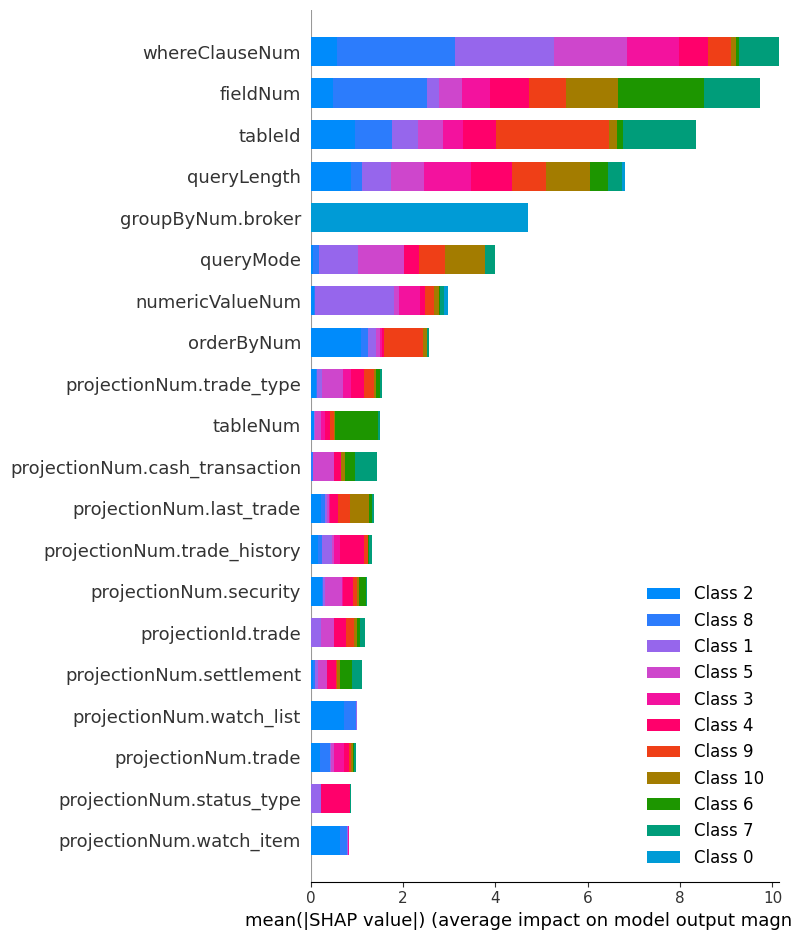

In [13]:
# SHAP 값을 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 1. SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X)

In [14]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

[14:55:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


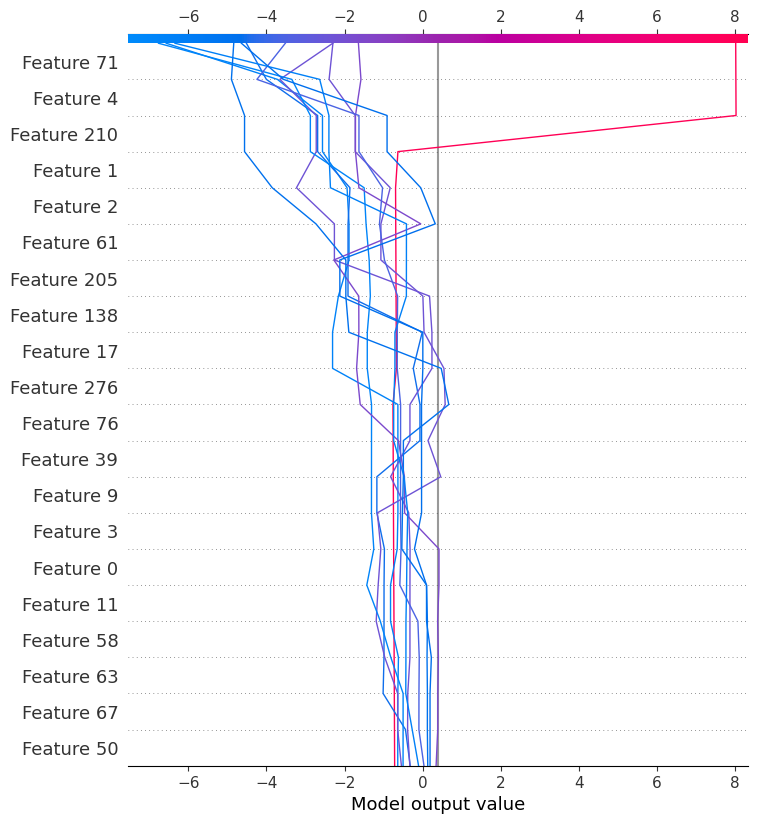

In [17]:
# 2. Decision Plot
shap.multioutput_decision_plot(explainer.expected_value, shap_values, 0)

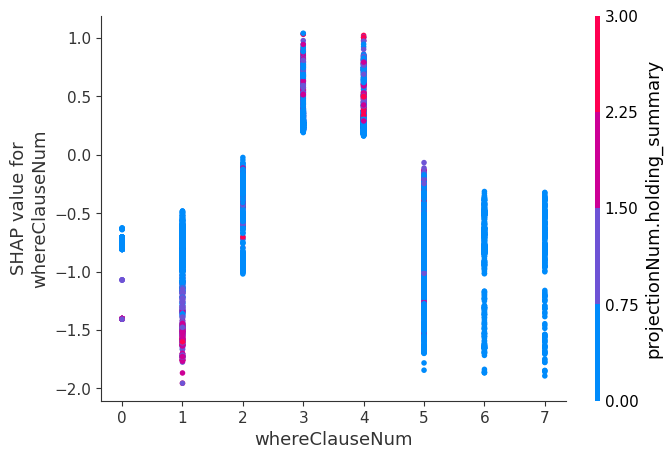

In [19]:
# 3. Dependency Plot
shap.dependence_plot('whereClauseNum', shap_values[2], X)